In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip "/content/drive/My Drive/trafficSign.zip" -d "/content/drive/My Drive/traffic_Symbol"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/traffic_Symbol/train/5/00005_00053_00010.png  
  inflating: /content/drive/My Drive/traffic_Symbol/train/5/00005_00053_00011.png  
  inflating: /content/drive/My Drive/traffic_Symbol/train/5/00005_00053_00012.png  
  inflating: /content/drive/My Drive/traffic_Symbol/train/5/00005_00053_00013.png  
  inflating: /content/drive/My Drive/traffic_Symbol/train/5/00005_00053_00014.png  
  inflating: /content/drive/My Drive/traffic_Symbol/train/5/00005_00053_00015.png  
  inflating: /content/drive/My Drive/traffic_Symbol/train/5/00005_00053_00016.png  
  inflating: /content/drive/My Drive/traffic_Symbol/train/5/00005_00053_00017.png  
  inflating: /content/drive/My Drive/traffic_Symbol/train/5/00005_00053_00018.png  
  inflating: /content/drive/My Drive/traffic_Symbol/train/5/00005_00053_00019.png  
  inflating: /content/drive/My Drive/traffic_Symbol/train/5/00005_00053_00020.png  
  inflating: /content/dri

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('/content/drive/MyDrive/traffic_Symbol')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path=os.getcwd()
cur_path

'/content/drive/My Drive/traffic_Symbol'

In [ ]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    #print(path)
    
    images = os.listdir(path)
    #print(images)
    
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [ ]:
data = np.array(data)
labels = np.array(labels)
data.shape

(39209, 30, 30, 3)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content/drive/My Drive/traffic_Symbol'

In [ ]:
os.mkdir('training')
np.save('./training/data',data)
np.save('./training/target',labels)

In [ ]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [ ]:
print(data.shape, labels.shape)

AttributeError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(38856, 30, 30, 3) (9715, 30, 30, 3) (38856,) (9715,)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
1215/1215 [==============================] - 164s 134ms/step - loss: 3.0473 - accuracy: 0.3251 - val_loss: 0.3858 - val_accuracy: 0.8955
Epoch 2/10
1215/1215 [==============================] - 163s 134ms/step - loss: 0.6914 - accuracy: 0.7918 - val_loss: 0.1736 - val_accuracy: 0.9501
Epoch 3/10
1215/1215 [==============================] - 168s 139ms/step - loss: 0.3996 - accuracy: 0.8798 - val_loss: 0.0977 - val_accuracy: 0.9760
Epoch 4/10
1215/1215 [==============================] - 164s 135ms/step - loss: 0.3098 - accuracy: 0.9087 - val_loss: 0.1056 - val_accuracy: 0.9687
Epoch 5/10
1215/1215 [==============================] - 163s 134ms/step - loss: 0.2801 - accuracy: 0.9180 - val_loss: 0.1048 - val_accuracy: 0.9686
Epoch 6/10
1215/1215 [==============================] - 163s 134ms/step - loss: 0.2549 - accuracy: 0.9269 - val_loss: 0.0574 - val_accuracy: 0.9850
Epoch 7/10
1215/1215 [==============================] - 163s 134ms/step - loss: 0.2666 - accuracy: 0.9255 - val_

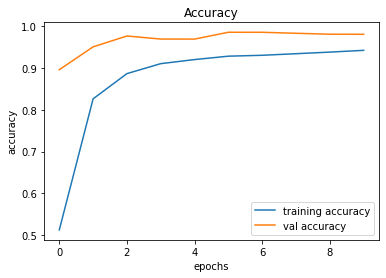

In [ ]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

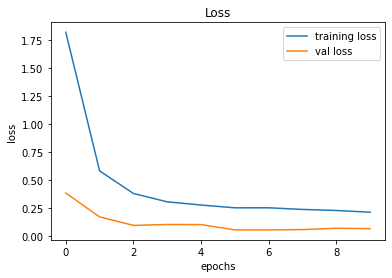

In [ ]:
#loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [ ]:
X_test, label = testing('Test.csv')

In [ ]:
Y_pred = model.predict_classes(X_test)
Y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ...,  5,  7, 10])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9433095803642122


In [ ]:
model.save("./training/TSR.h5")

In [ ]:
import os
os.chdir(r'/content/drive/My Drive/traffic_Symbol')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Ahead only


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


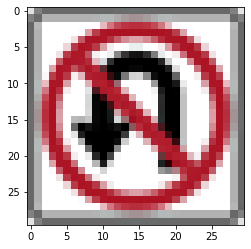

In [ ]:
plot,prediction = test_on_img(r'/content/drive/MyDrive/traffic_Symbol/Validation/2.jpg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

In [ ]:
image = os.listdir('/content/drive/MyDrive/traffic_Symbol/Validation')
image

['2.jpg',
 '3.jpg',
 '11.jpg',
 '22.jpg',
 '33.jpg',
 '55.jpg',
 'val1.jpg',
 'val3.jpg',
 'val2.jpg']

Predicted traffic sign is:  Ahead only


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


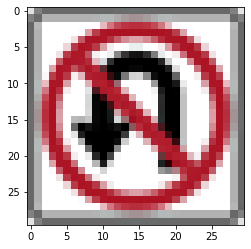

Predicted traffic sign is:  General caution


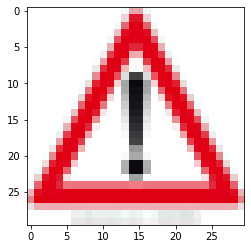

Predicted traffic sign is:  No entry


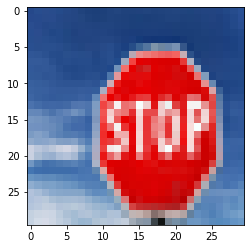

Predicted traffic sign is:  Keep left


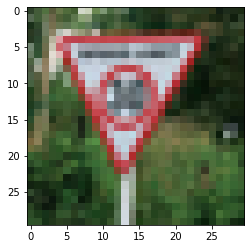

Predicted traffic sign is:  Yield


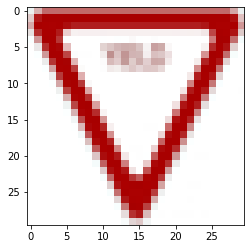

Predicted traffic sign is:  Double curve


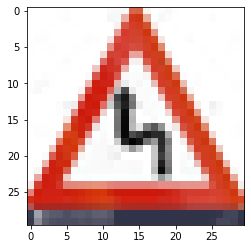

Predicted traffic sign is:  No passing


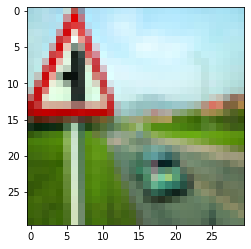

Predicted traffic sign is:  Priority road


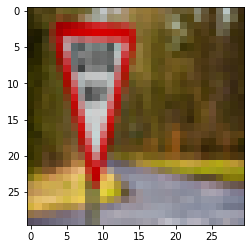

Predicted traffic sign is:  Slippery road


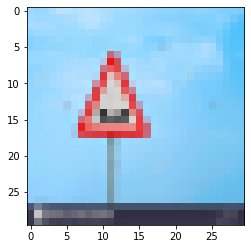

In [ ]:
for n in image:
  plot,prediction = test_on_img(r'/content/drive/MyDrive/traffic_Symbol/Validation'+'/'+n)
  s = [str(i) for i in prediction] 
  a = int("".join(s)) 
  print("Predicted traffic sign is: ", classes[a])
  plt.imshow(plot)
  plt.show()
